# Must Run

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import scipy as sci
import scipy.signal as sig
import scipy.spatial as spa
from IPython.display import Audio
wave = np.sin(2*np.pi*400*np.arange(10000*2)/10000)

ex = './Historical Data/%s.csv'
path = ex % 'LCM'
!wc -1 $psth

wc: illegal option -- 1
usage: wc [-clmw] [file ...]


# Pollen

In [4]:
pollen = pd.read_csv('/Users/athenaye/Downloads/pollen.csv', index_col = 'Date')

In [5]:
pollen.astype(bool).sum(axis=0)

Ambrosia          135
Artemisia         886
Asteraceae        570
Alnus            1443
Betula           1402
Ericaceae          85
Carpinus          702
Castanea         1110
Quercus          1148
Chenopodium       931
Cupressaceae     2521
Acer              332
Fraxinus         1251
Gramineae        3262
Fagus             704
Juncaceae         208
Aesculus          272
Larix             214
Corylus          1329
Juglans           408
Umbellifereae     417
Ulmus             577
Urtica           3388
Rumex            1433
Populus           783
Pinaceae         2300
Plantago         1802
Platanus          667
Salix            1323
Cyperaceae        192
Filipendula      1101
Sambucus          822
Tilia             403
dtype: int64

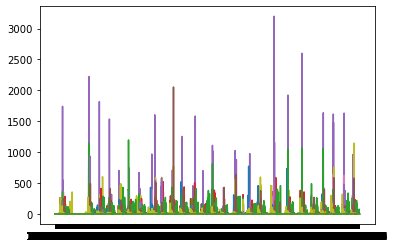

In [41]:
plt.plot(pollen)

In [6]:
hi = np.array(pollen.index)

In [7]:
hi.max()

'2018-12-31'

## Detrended Pollen

In [58]:
detrendedpollen = sig.detrend(pollen)
detrendedpollen = pd.DataFrame(detrendedpollen, columns = pollen.columns, index = pollen.index)

In [59]:
detrendedpollen

,Ambrosia,Artemisia,Asteraceae,Alnus,Betula,Ericaceae,Carpinus,Castanea,Quercus,Chenopodium,...,Rumex,Populus,Pinaceae,Plantago,Platanus,Salix,Cyperaceae,Filipendula,Sambucus,Tilia
Date,,,,,,,,,,,,,,,,,,,,,
1993-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1993-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2001-01-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2001-01-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2001-01-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992-08-18,-0.450980,0.437054,-0.674911,-0.786876,-0.898841,-1.010807,-1.122772,-0.234737,-1.346702,2.541332,...,-3.026181,-3.138146,-3.250111,-3.362077,-3.474042,-3.586007,-3.697972,-0.809938,-3.921903,-4.033868
1992-08-19,-0.736185,1.120432,1.977050,-1.166332,-1.309715,-1.453097,-1.596480,-1.739862,-1.883244,2.973373,...,-4.033980,-4.177362,-4.320744,-4.464127,-4.607509,-4.750891,-4.894274,-0.037656,-5.181038,-5.324421
1992-08-20,-0.256684,1.651404,0.559492,-0.532420,-0.624332,-0.716243,-0.808155,-0.900067,-0.991979,-0.083890,...,-2.370655,-2.462567,-2.554479,-2.646390,-2.738302,-2.830214,-2.922126,-2.014037,-3.105949,-3.197861


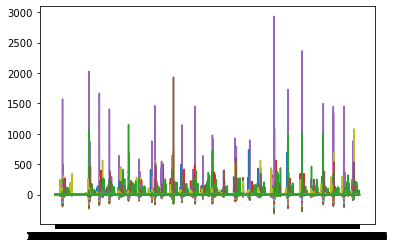

In [60]:
plt.plot(detrendedpollen)

In [61]:
detrendedpollen

,Ambrosia,Artemisia,Asteraceae,Alnus,Betula,Ericaceae,Carpinus,Castanea,Quercus,Chenopodium,...,Rumex,Populus,Pinaceae,Plantago,Platanus,Salix,Cyperaceae,Filipendula,Sambucus,Tilia
Date,,,,,,,,,,,,,,,,,,,,,
1993-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1993-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2001-01-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2001-01-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2001-01-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992-08-18,-0.450980,0.437054,-0.674911,-0.786876,-0.898841,-1.010807,-1.122772,-0.234737,-1.346702,2.541332,...,-3.026181,-3.138146,-3.250111,-3.362077,-3.474042,-3.586007,-3.697972,-0.809938,-3.921903,-4.033868
1992-08-19,-0.736185,1.120432,1.977050,-1.166332,-1.309715,-1.453097,-1.596480,-1.739862,-1.883244,2.973373,...,-4.033980,-4.177362,-4.320744,-4.464127,-4.607509,-4.750891,-4.894274,-0.037656,-5.181038,-5.324421
1992-08-20,-0.256684,1.651404,0.559492,-0.532420,-0.624332,-0.716243,-0.808155,-0.900067,-0.991979,-0.083890,...,-2.370655,-2.462567,-2.554479,-2.646390,-2.738302,-2.830214,-2.922126,-2.014037,-3.105949,-3.197861


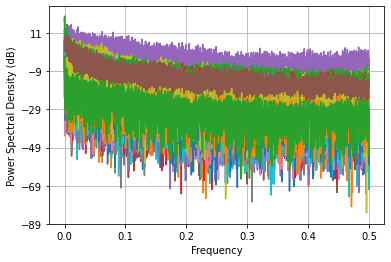

In [62]:
dtpollendata = pd.DataFrame()

for r in detrendedpollen.columns:
    genus = detrendedpollen[r]
    a, b = plt.psd(genus, Fs = 1, scale_by_freq = False, NFFT = 2**14)
    a = pd.DataFrame(a)
    dtpollendata = pd.concat([dtpollendata, a], axis = 1, names = r)
    dtpollenindex = b
dtpollendata.columns = detrendedpollen.columns

In [63]:
dtpollenhm = dtpollendata.set_index(dtpollenindex)
dtsampled = dtpollenhm.iloc[:,0:5]

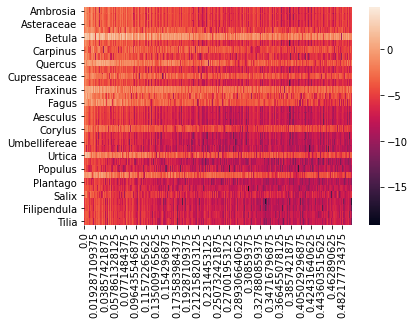

In [64]:
dtpollenloghm = np.log(dtpollenhm)
dtpollenfig = sns.heatmap(dtpollenloghm.T)

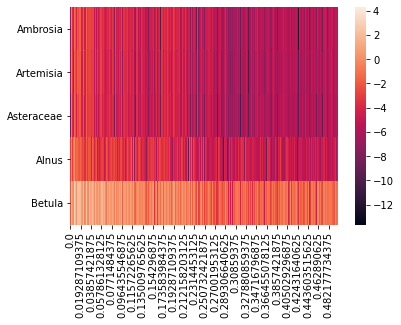

In [65]:
dtpollenloghmsamp = np.log(dtsampled)
dtpollenfigsamp = sns.heatmap(dtpollenloghmsamp.T)

In [66]:
param = dtsampled.columns
interpolated = pd.DataFrame()
for x in range(len(param)):
    base = sci.interpolate.interp1d(1/dtsampled.index[1:],dtsampled.iloc[1:,x], kind = 'nearest')
    xvalues = np.linspace(1,13, num = 8193, endpoint = True)
    xvalues = xvalues[::-1]
    xvalues = 2**xvalues
    interparray = base(xvalues)
    series = pd.Series(interparray, index = xvalues)
    interpolated = pd.concat([interpolated, series], axis = 1)
    interpolated.rename_axis('frequency')
    interpolated.rename_axis('measurement', axis='columns')
interpolated.columns = param

In [67]:
yvalues = np.array(range(0,8193)) #y-values
xtickmarkloc = [2, 4, 8, 16, 32, 64, 128, 256, 365, 365*2, 365*4, 365*8, 365*16, 8192] #setting the xtickmark locations (numbers represent the period in days)

x = xvalues #the x-values to interpolate along??
y = yvalues #the y-values to interpolate along??
f = sci.interpolate.interp1d(x, y) #interpolating 
xnew = xtickmarkloc #the desired x-values
ynew = f(xnew) #list of values

([<matplotlib.axis.XTick at 0x7ff42d459850>,
 [Text(8192.0, 0, '2d'),
  Text(7509.333446156619, 0, '4d'),
  Text(6826.666779477225, 0, '8d'),
  Text(6144.0, 0, '16d'),
  Text(5461.333446156619, 0, '32d'),
  Text(4778.666779477225, 0, '64d'),
  Text(4096.0, 0, '128d'),
  Text(3413.3334461566187, 0, '256d'),
  Text(3063.9768665044767, 0, '1yr'),
  Text(2381.3102969966953, 0, '2yr'),
  Text(1698.6436381508265, 0, '4yr'),
  Text(1015.9768665044764, 0, '8yr'),
  Text(333.31029699669557, 0, '16yr'),
  Text(0.0, 0, '8192d')])

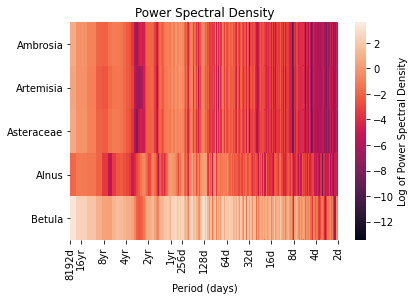

In [68]:
s = sns.heatmap(np.log(interpolated.T), cbar_kws={'label': 'Log of Power Spectral Density'}) #creating the heatmap and labeling the color bar
s.set_title('Power Spectral Density') #setting the heatmap title
s.set_xlabel('Period (days)') #setting the heatmap x-axis label
newlabel = ['2d', '4d','8d','16d','32d','64d','128d','256d','1yr', '2yr', '4yr', '8yr', '16yr', '8192d'] #setting the x-axis labels
plt.xticks(ynew, newlabel) #plotting the x-ticks and the newlabels

## All Pollen

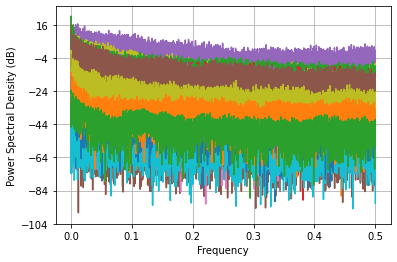

In [8]:
pollendata = pd.DataFrame()

for r in pollen.columns:
    genus = pollen[r]
    a, b = plt.psd(genus, Fs = 1, scale_by_freq = False, NFFT = 2**14)
    a = pd.DataFrame(a)
    pollendata = pd.concat([pollendata, a], axis = 1, names = r)
    pollenindex = b
pollendata.columns = pollen.columns

In [9]:
pollenindex

array([0.00000000e+00, 6.10351562e-05, 1.22070312e-04, ...,
       4.99877930e-01, 4.99938965e-01, 5.00000000e-01])

In [10]:
pollenhm = pollendata.set_index(pollenindex)
sampled = pollenhm.iloc[:,0:5]

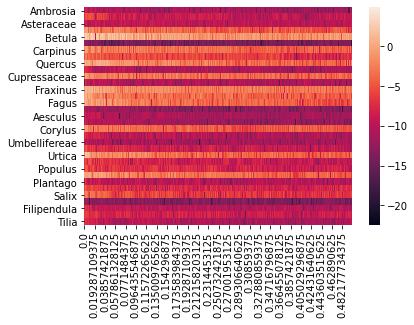

In [11]:
pollenloghm = np.log(pollenhm)
pollenfig = sns.heatmap(pollenloghm.T)

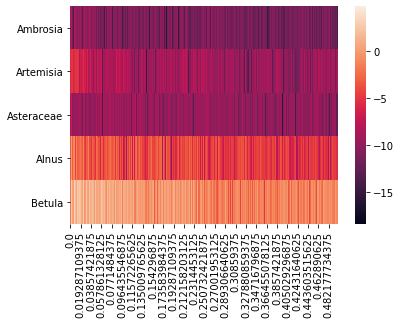

In [27]:
pollenloghmsamp = np.log(sampled)
pollenfigsamp = sns.heatmap(pollenloghmsamp.T)

In [219]:
param = sampled.columns
interpolated = pd.DataFrame()
for x in range(len(param)):
    base = sci.interpolate.interp1d(1/sampled.index[1:],sampled.iloc[1:,x], kind = 'nearest')
    xvalues = np.linspace(1,13, num = 8193, endpoint = True)
    xvalues = xvalues[::-1]
    xvalues = 2**xvalues
    interparray = base(xvalues)
    series = pd.Series(interparray, index = xvalues)
    interpolated = pd.concat([interpolated, series], axis = 1)
    interpolated.rename_axis('frequency')
    interpolated.rename_axis('measurement', axis='columns')
interpolated.columns = param

In [220]:
yvalues = np.array(range(0,8193)) #y-values
xtickmarkloc = [2, 4, 8, 16, 32, 64, 128, 256, 365, 365*2, 365*4, 365*8, 365*16, 8192] #setting the xtickmark locations (numbers represent the period in days)

x = xvalues #the x-values to interpolate along??
y = yvalues #the y-values to interpolate along??
f = sci.interpolate.interp1d(x, y) #interpolating 
xnew = xtickmarkloc #the desired x-values
ynew = f(xnew) #list of values

([<matplotlib.axis.XTick at 0x7fe6c6714730>,
 [Text(8192.0, 0, '2d'),
  Text(7509.333446156619, 0, '4d'),
  Text(6826.666779477225, 0, '8d'),
  Text(6144.0, 0, '16d'),
  Text(5461.333446156619, 0, '32d'),
  Text(4778.666779477225, 0, '64d'),
  Text(4096.0, 0, '128d'),
  Text(3413.3334461566187, 0, '256d'),
  Text(3063.9768665044767, 0, '1yr'),
  Text(2381.3102969966953, 0, '2yr'),
  Text(1698.6436381508265, 0, '4yr'),
  Text(1015.9768665044764, 0, '8yr'),
  Text(333.31029699669557, 0, '16yr'),
  Text(0.0, 0, '8192d')])

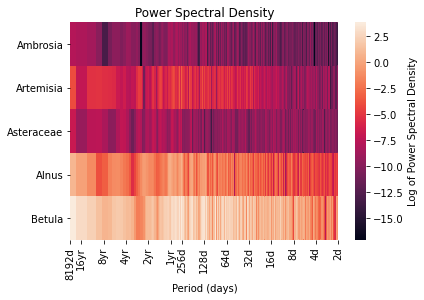

In [221]:
s = sns.heatmap(np.log(interpolated.T), cbar_kws={'label': 'Log of Power Spectral Density'}) #creating the heatmap and labeling the color bar
s.set_title('Power Spectral Density') #setting the heatmap title
s.set_xlabel('Period (days)') #setting the heatmap x-axis label
newlabel = ['2d', '4d','8d','16d','32d','64d','128d','256d','1yr', '2yr', '4yr', '8yr', '16yr', '8192d'] #setting the x-axis labels
plt.xticks(ynew, newlabel) #plotting the x-ticks and the newlabels

# AWND

In [2]:
years = []
stationlist = ['AQW00061705', 'FMW00040308','GQW00041415', 'RQW00011641', 'USC00244558']
year = 0
ultimate = pd.DataFrame()
for f in glob.glob("/Users/athenaye/Desktop/by_year_parquet_trial/*.parquet"):    
    read = pd.read_parquet(f)
    f = pd.DataFrame()
    parameter = 'AWND'
    if parameter in read.columns:
        years.append(f)
    else:
        print(str(parameter)+ ' was not found in ' + f)
        break
    read = read[parameter]
    for s in range(len(stationlist)):
        stationtavg = read.xs((stationlist[s]), level = "station")
        #print(stationtavg)
        f['station '+str(stationlist[s])] = stationtavg
    ultimate = pd.concat([ultimate, f])
    print("Done with 1 year")
    year += 1
awndoverall = ultimate.sort_values(by='date')
Audio(wave, rate=10000, autoplay=True)

Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year


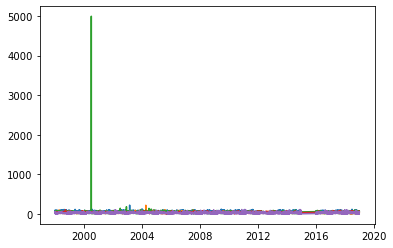

In [3]:
plt.plot(awndoverall)

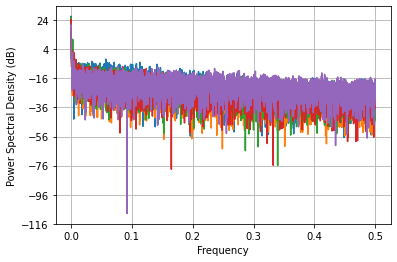

In [4]:
for x in range(len(awndoverall.columns)):
    nonan = awndoverall[awndoverall.columns[x]]
    nonan = nonan.interpolate('linear')
    a,b = plt.psd(nonan, Fs = 1, scale_by_freq = False, NFFT = 2**14 )
    if x == 0:
        acumulative = a
        bcumulative = b
    else:
        acumulative = np.vstack([acumulative, a])
        bcumulative = np.vstack([bcumulative, b])
aawndmean = acumulative.mean(axis=(0))
bawndmean = bcumulative.mean(axis=(0))

# TAVG

In [30]:
years = []
stationlist = ['AE000041196', 'AEM00041194', 'AEM00041217', 'AEM00041218', 'AG000060390']
year = 0
ultimate = pd.DataFrame()
for f in glob.glob("/Users/athenaye/Desktop/by_year_parquet_trial/*.parquet"):    
    read = pd.read_parquet(f)
    f = pd.DataFrame()
    parameter = 'TAVG'
    if parameter in read.columns:
        years.append(f)
    else:
        print(str(parameter)+ ' was not found in ' + f)
        break
    read = read[parameter]
    for s in range(len(stationlist)):
        stationtavg = read.xs((stationlist[s]), level = "station")
        #print(stationtavg)
        f['station '+str(stationlist[s])] = stationtavg
    ultimate = pd.concat([ultimate, f])
    print("Done with 1 year")
    year += 1
avgoverall = ultimate.sort_values(by='date')

Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year


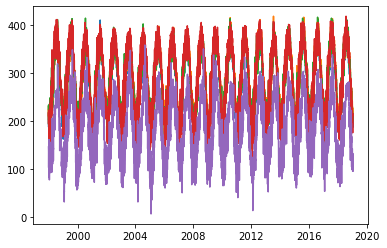

In [232]:
plt.plot(avgoverall)

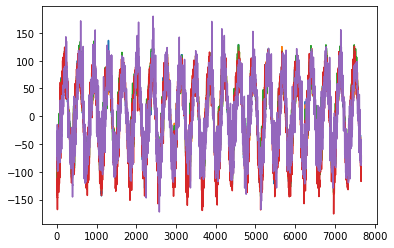

In [76]:
dt = pd.DataFrame()
for x in range(len(avgoverall.columns)):
    dtnonan = avgoverall[avgoverall.columns[x]]
    dtnonan = dtnonan.interpolate('linear')
    detrend = sig.detrend(dtnonan)
    detrend = pd.DataFrame(detrend)
    dt = pd.concat([dt, detrend], axis = 1)
plt.plot(dt)

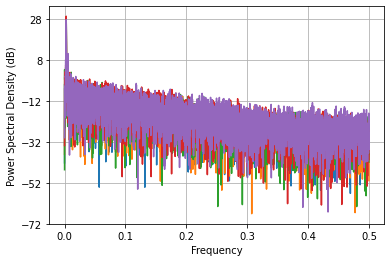

In [80]:
for x in range(len(dt.columns)):
    dtnonan = avgoverall[avgoverall.columns[x]]
    dtnonan = dtnonan.interpolate('linear')
    detrend = sig.detrend(dtnonan)
    detrend = pd.DataFrame(detrend)
    a,b = plt.psd(detrend, Fs = 1, scale_by_freq = False, NFFT = 2**14 )
    if x == 0:
        acumulative = a
        bcumulative = b
    else:
        acumulative = np.vstack([acumulative, a])
        bcumulative = np.vstack([bcumulative, b])
dtamean = acumulative.mean(axis=(0))
dtbmean = bcumulative.mean(axis=(0))

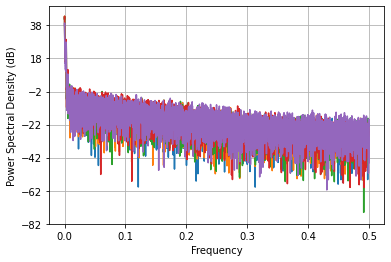

In [82]:
for x in range(len(avgoverall.columns)):
    nonan = avgoverall[avgoverall.columns[x]]
    nonan = nonan.interpolate('linear')
    a,b = plt.psd(nonan, Fs = 1, scale_by_freq = False, NFFT = 2**14 )
    if x == 0:
        acumulative = a
        bcumulative = b
    else:
        acumulative = np.vstack([acumulative, a])
        bcumulative = np.vstack([bcumulative, b])
amean = acumulative.mean(axis=(0))
bmean = bcumulative.mean(axis=(0))

# TMAX

Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year


<AxesSubplot:xlabel='date'>

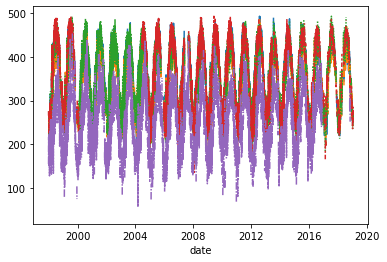

In [18]:
years = []
stationlist = ['AE000041196', 'AEM00041194', 'AEM00041217', 'AEM00041218', 'AG000060390']
year = 0
ultimate = pd.DataFrame()
for f in glob.glob("/Users/athenaye/Desktop/by_year_parquet_trial/*.parquet"):    
    read = pd.read_parquet(f)
    f = pd.DataFrame()
    parameter = 'TMAX'
    if parameter in read.columns:
        years.append(f)
    else:
        print(str(parameter)+ ' was not found in ' + f)
        break
    read = read[parameter]
    #print(read)
    for s in range(len(stationlist)):
        stationtavg = read.xs((stationlist[s]), level = "station")
        #print(stationtavg)
        f['station '+str(stationlist[s])] = stationtavg
        #print(f)
    ultimate = pd.concat([ultimate, f])
    print("Done with 1 year")
    year += 1
maxoverall = ultimate.sort_values(by='date')
sns.lineplot(data = maxoverall, legend = False)

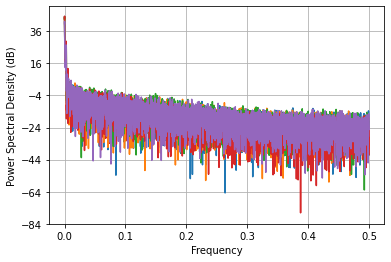

In [19]:
for x in range(len(maxoverall.columns)):
    nonan = maxoverall[maxoverall.columns[x]]
    nonan = nonan.interpolate('time', limit_direction='both')
    a,b = plt.psd(nonan, Fs = 1, scale_by_freq = False, NFFT = 2**14 )
    
    if x == 0:
        tmaxacumulative = a
        tmaxbcumulative = b
    else:
        tmaxacumulative = np.vstack([tmaxacumulative, a])
        tmaxbcumulative = np.vstack([tmaxbcumulative, b])
tmaxamean = np.nanmean(tmaxacumulative, axis=(0))
tmaxbmean = np.nanmean(tmaxbcumulative, axis=(0))

# TMIN

Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year


<AxesSubplot:xlabel='date'>

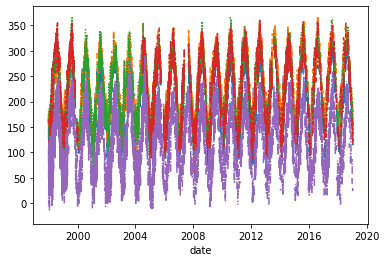

In [20]:
years = []
stationlist = ['AE000041196', 'AEM00041194', 'AEM00041217', 'AEM00041218', 'AG000060390']
year = 0
ultimate = pd.DataFrame()
for f in glob.glob("/Users/athenaye/Desktop/by_year_parquet_trial/*.parquet"):    
    read = pd.read_parquet(f)
    #print(f)
    f = pd.DataFrame()
    parameter = 'TMIN'
    if parameter in read.columns:
        years.append(f)
    else:
        print(str(parameter)+ ' was not found in ' + f)
        break
    read = read[parameter]
    #print(read)
    for s in range(len(stationlist)):
        stationtavg = read.xs((stationlist[s]), level = "station")
        #print(stationtavg)
        f['station '+str(stationlist[s])] = stationtavg
        #print(f)
    ultimate = pd.concat([ultimate, f])
    print("Done with 1 year")
    year += 1
minoverall = ultimate.sort_values(by='date')
sns.lineplot(data = minoverall, legend = False)

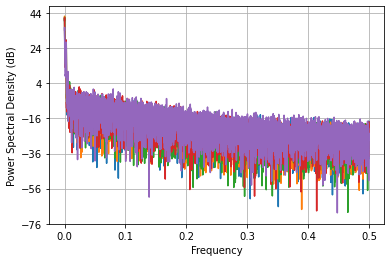

In [21]:

for x in range(len(minoverall.columns)):
    nonan = minoverall[minoverall.columns[x]]
    nonan = nonan.interpolate('time',limit_direction='both')
    a,b = plt.psd(nonan, Fs = 1, scale_by_freq = False, NFFT = 2**14 )
    
    if x == 0:
        tminacumulative = a
        tminbcumulative = b
    else:
        tminacumulative = np.vstack([tminacumulative, a])
        tminbcumulative = np.vstack([tminbcumulative, b])
tminamean = np.nanmean(tminacumulative, axis=(0))
tminbmean = np.nanmean(tminbcumulative, axis=(0))

# PRCP

Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year


<AxesSubplot:xlabel='date'>

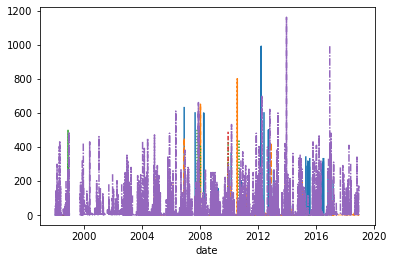

In [22]:
years = []
stationlist = ['AE000041196', 'AEM00041194', 'AEM00041217', 'AEM00041218', 'AG000060390']
year = 0
ultimate = pd.DataFrame()
for f in glob.glob("/Users/athenaye/Desktop/by_year_parquet_trial/*.parquet"):    
    read = pd.read_parquet(f)
    #print(f)
    f = pd.DataFrame()
    parameter = 'PRCP'
    if parameter in read.columns:
        years.append(f)
    else:
        print(str(parameter)+ ' was not found in ' + f)
        break
    read = read[parameter]
    #print(read)
    for s in range(len(stationlist)):
        stationtavg = read.xs((stationlist[s]), level = "station")
        #print(stationtavg)
        f['station '+str(stationlist[s])] = stationtavg
        #print(f)
    ultimate = pd.concat([ultimate, f])
    print("Done with 1 year")
    year += 1
prcpoverall = ultimate.sort_values(by='date')
sns.lineplot(data = prcpoverall, legend = False)

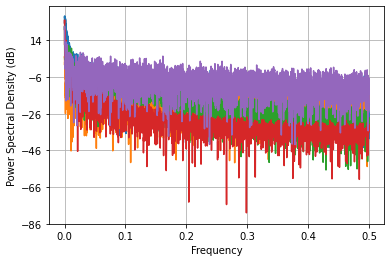

In [23]:
for x in range(len(prcpoverall.columns)):
    nonan = prcpoverall[prcpoverall.columns[x]]
    nonan = nonan.interpolate('time',limit_direction='both')
    a,b = plt.psd(nonan, Fs = 1, scale_by_freq = False, NFFT = 2**14 )
    
    if x == 0:
        prcpacumulative = a
        prcpbcumulative = b
    else:
        prcpacumulative = np.vstack([prcpacumulative, a])
        prcpbcumulative = np.vstack([prcpbcumulative, b])
prcpamean = np.nanmean(prcpacumulative, axis=(0))
prcpbmean = np.nanmean(prcpbcumulative, axis=(0))

# Frequency vs. Power Heatmap

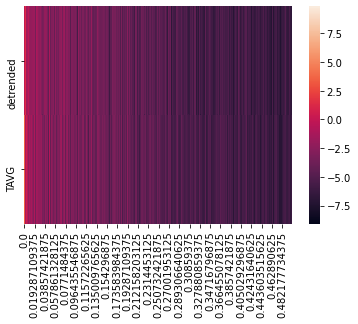

In [84]:
param0 = ['detrended']
param1 = ['TAVG']
param2 = ['TMAX']
param3 = ['TMIN']
param4 = ['PRCP']
param5 = ['AWND']

hm0 = pd.DataFrame(data = dtamean, columns = param0, index = dtbmean)
hm1 = pd.DataFrame(data = amean, columns = param1, index = bmean)
#hm2 = pd.DataFrame(data = tmaxamean, columns = param2, index = tmaxbmean)
# hm3 = pd.DataFrame(data = tminamean, columns = param3, index = tminbmean)
# hm4 = pd.DataFrame(data = prcpamean, columns = param4, index = prcpbmean)
# hm5 = pd.DataFrame(data = aawndmean, columns = param5, index = bawndmean)
#hm = pd.concat([hm2, hm0, hm1, hm3, hm4, hm5], axis=1)
hm = pd.concat([hm0, hm1], axis=1)
loghm = np.log(hm)
fig = sns.heatmap(loghm.T)

# Period vs. Power Heatmap

In [85]:
#param = ['TMAX', 'TAVG', 'TMIN', 'PRCP', 'AWND', 'Urtica']
param = ['detrended', 'TAVG']
interpolated = pd.DataFrame()
for x in range(len(param)):
    base = sci.interpolate.interp1d(1/hm.index[1:],hm.iloc[1:,x], kind = 'nearest')
    xvalues = np.linspace(1,13, num = 8193, endpoint = True)
    xvalues = xvalues[::-1]
    xvalues = 2**xvalues
    interparray = base(xvalues)
    series = pd.Series(interparray, index = xvalues)
    interpolated = pd.concat([interpolated, series], axis = 1)
    interpolated.rename_axis('frequency')
    interpolated.rename_axis('measurement', axis='columns')
interpolated.columns = param

In [86]:
yvalues = np.array(range(0,8193)) #y-values
xtickmarkloc = [2, 4, 8, 16, 32, 64, 128, 256, 365, 365*2, 365*4, 365*8, 365*16, 8192] #setting the xtickmark locations (numbers represent the period in days)

x = xvalues #the x-values to interpolate along??
y = yvalues #the y-values to interpolate along??
f = sci.interpolate.interp1d(x, y) #interpolating 
xnew = xtickmarkloc #the desired x-values
ynew = f(xnew) #list of values

([<matplotlib.axis.XTick at 0x7ff43410d7f0>,
 [Text(8192.0, 0, '2d'),
  Text(7509.333446156619, 0, '4d'),
  Text(6826.666779477225, 0, '8d'),
  Text(6144.0, 0, '16d'),
  Text(5461.333446156619, 0, '32d'),
  Text(4778.666779477225, 0, '64d'),
  Text(4096.0, 0, '128d'),
  Text(3413.3334461566187, 0, '256d'),
  Text(3063.9768665044767, 0, '1yr'),
  Text(2381.3102969966953, 0, '2yr'),
  Text(1698.6436381508265, 0, '4yr'),
  Text(1015.9768665044764, 0, '8yr'),
  Text(333.31029699669557, 0, '16yr'),
  Text(0.0, 0, '8192d')])

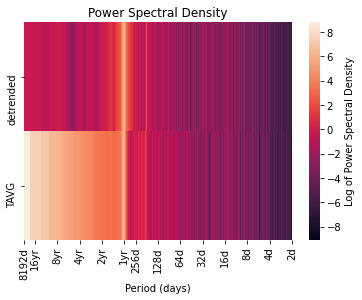

In [87]:
s = sns.heatmap(np.log(interpolated.T), cbar_kws={'label': 'Log of Power Spectral Density'}) #creating the heatmap and labeling the color bar
s.set_title('Power Spectral Density') #setting the heatmap title
s.set_xlabel('Period (days)') #setting the heatmap x-axis label
newlabel = ['2d', '4d','8d','16d','32d','64d','128d','256d','1yr', '2yr', '4yr', '8yr', '16yr', '8192d'] #setting the x-axis labels
plt.xticks(ynew, newlabel) #plotting the x-ticks and the newlabels